### Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


### Importing Dependencies

In [284]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

### Loading the Dataset

In [163]:
df=pd.read_csv('creditcard.csv')

##### Displaying all columns in the Dataset

In [165]:
pd.options.display.max_columns=None

##### Displaying above five rows and below 5 rows

In [167]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [171]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [173]:
df.shape

(284807, 31)

In [175]:
print("No. of Rows", df.shape[0])
print("No. of Columns", df.shape[1])

No. of Rows 284807
No. of Columns 31


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking for missing values

In [180]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Scaling the 'Amount' Feature in the Dataset

In [184]:
sc=StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [186]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [188]:
df=df.drop(['Time'],axis=1)

In [190]:
df.shape

(284807, 30)

#### Checking the duplicated values and if any then eliminate them

In [193]:
df.duplicated().any()

True

In [195]:
df=df.drop_duplicates()

In [197]:
df.shape

(275663, 30)

#### Analysing the target feature 'Class'

In [200]:
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

#### Splitting into independent and dependent variables

In [205]:
X=df.drop('Class',axis=1)
y=df['Class']

## As we can see our Dataset is highly imbalanced so to deal with it we will use either Undersampling or Oversampling whichever give better result

# Undersampling

In [211]:
normal_transaction=df[df['Class']==0]
fraud_transaction=df[df['Class']==1]

In [213]:
fraud_transaction.shape

(473, 30)

In [215]:
normal_transaction_sample=normal_transaction.sample(n=473)

In [217]:
normal_transaction_sample.shape

(473, 30)

In [219]:
new_data=pd.concat([normal_transaction_sample,fraud_transaction],ignore_index=True)

In [221]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [223]:
X=new_data.drop('Class',axis=1)
y=new_data['Class']

#### Splitting the Data into training and testing

In [226]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Train the Model 

### 1. Logistic Regression

In [230]:
log_1=LogisticRegression()
log_1.fit(X_train,y_train)


LogisticRegression()

In [232]:
y_pred_log_1=log_1.predict(X_test)

#### Evaluating the Model Performance

In [243]:
print( "Accuracy Score", accuracy_score(y_test,y_pred_log_1))
print( "Recall Score",recall_score(y_test,y_pred_log_1))
print( "Precision Score",precision_score(y_test,y_pred_log_1))
print( "F1 Score",f1_score(y_test,y_pred_log_1))

Accuracy Score 0.9473684210526315
Recall Score 0.9117647058823529
Precision Score 0.9893617021276596
F1 Score 0.9489795918367347


### 2. Decision Tree Classifier

In [247]:
dt_1=DecisionTreeClassifier()
dt_1.fit(X_train,y_train)



DecisionTreeClassifier()

In [249]:
y_pred_dt_1=dt_1.predict(X_test)

#### Evaluating the Model Performance

In [255]:
print( "Accuracy Score", accuracy_score(y_test,y_pred_dt_1))
print( "Recall Score",recall_score(y_test,y_pred_dt_1))
print( "Precision Score",precision_score(y_test,y_pred_dt_1))
print( "F1 Score",f1_score(y_test,y_pred_dt_1))

Accuracy Score 0.9368421052631579
Recall Score 0.9411764705882353
Precision Score 0.9411764705882353
F1 Score 0.9411764705882353


### 3. Random Forest Classifier

In [258]:
rf_1=RandomForestClassifier()
rf_1.fit(X_train,y_train)

RandomForestClassifier()

In [260]:
y_pred_rf_1=rf_1.predict(X_test)

#### Evaluating the model performance

In [264]:
print( "Accuracy Score", accuracy_score(y_test,y_pred_rf_1))
print( "Recall Score",recall_score(y_test,y_pred_rf_1))
print( "Precision Score",precision_score(y_test,y_pred_rf_1))
print( "F1 Score",f1_score(y_test,y_pred_rf_1))

Accuracy Score 0.9421052631578948
Recall Score 0.9019607843137255
Precision Score 0.989247311827957
F1 Score 0.9435897435897436


In [268]:
undersampling_result=pd.DataFrame({'Models':['Logistic Regression', 'Decision Tree', 'Random Forest'],
                     'Accuracy':[accuracy_score(y_test,y_pred_log_1)*100,
                                  accuracy_score(y_test,y_pred_dt_1)*100,
                                  accuracy_score(y_test,y_pred_rf_1)*100]})

In [270]:
undersampling_result

,Models,Accuracy
0,Logistic Regression,94.736842
1,Decision Tree,93.684211
2,Random Forest,94.210526


<Axes: xlabel='Models', ylabel='Accuracy'>

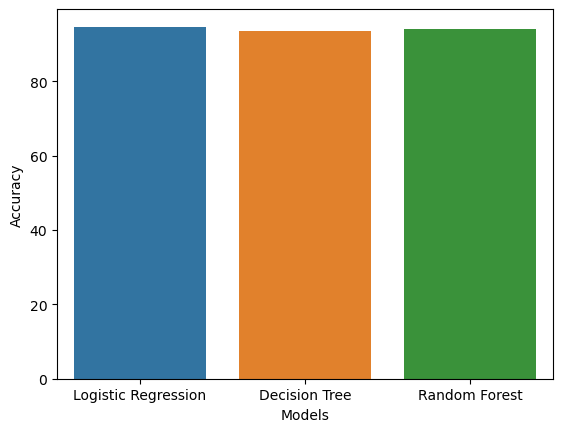

In [272]:
sns.barplot(x='Models',y='Accuracy',data=undersampling_result)

### According to Undersampling , Logistic Regression is better model compare to others for this dataset with accuracy of 94.736842

# Oversampling

In [280]:

X=df.drop('Class',axis=1)
y=df['Class']


In [282]:
X.shape,y.shape

((275663, 29), (275663,))

In [286]:
X_resample,y_resample=SMOTE().fit_resample(X,y)

In [288]:
y_resample.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

#### Splitting the dataset into training and testing data

In [291]:
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=0.2,random_state=42)

### Train the Model

### 1. Logistic Regression

In [293]:
log_2=LogisticRegression()
log_2.fit(X_train,y_train)

LogisticRegression()

In [295]:
y_pred_log_2=log_2.predict(X_test)

#### Evaluating the model performance

In [301]:
print( "Accuracy Score", accuracy_score(y_test,y_pred_log_2))
print( "Recall Score",recall_score(y_test,y_pred_log_2))
print( "Precision Score",precision_score(y_test,y_pred_log_2))
print( "F1 Score",f1_score(y_test,y_pred_log_2))


Accuracy Score 0.9442476107416694
Recall Score 0.9136047124702289
Precision Score 0.9731776280114649
F1 Score 0.9424506981498326


### 2. Decision Tree Classifier

In [304]:
dt_2=DecisionTreeClassifier()
dt_2.fit(X_train,y_train)

DecisionTreeClassifier()

In [305]:
y_pred_dt_2=dt_2.predict(X_test)

#### Evaluating the model performance

In [309]:
print( "Accuracy Score", accuracy_score(y_test,y_pred_dt_2))
print( "Recall Score",recall_score(y_test,y_pred_dt_2))
print( "Precision Score",precision_score(y_test,y_pred_dt_2))
print( "F1 Score",f1_score(y_test,y_pred_dt_2))

Accuracy Score 0.9983193429993823
Recall Score 0.9991818628074832
Precision Score 0.9974590729246071
F1 Score 0.9983197246164885


### 3. Random Forest Classifier

In [314]:
rf_2=RandomForestClassifier()
rf_2.fit(X_train,y_train)

RandomForestClassifier()

In [315]:
y_pred_rf_2=rf_2.predict(X_test)

#### Evaluating the model performance

In [317]:
print( "Accuracy Score", accuracy_score(y_test,y_pred_rf_2))
print( "Recall Score",recall_score(y_test,y_pred_rf_2))
print( "Precision Score",precision_score(y_test,y_pred_rf_2))
print( "F1 Score",f1_score(y_test,y_pred_rf_2))

Accuracy Score 0.9999091536756423
Recall Score 1.0
Precision Score 0.999818224783233
F1 Score 0.9999091041303083


In [318]:
result_oversampling=pd.DataFrame({'Models':['Logistic Regression', 'Decision Tree', 'Random Forest'],
                     'Accuracy':[accuracy_score(y_test,y_pred_log_2)*100,
                                  accuracy_score(y_test,y_pred_dt_2)*100,
                                  accuracy_score(y_test,y_pred_dt_2)*100]})

In [319]:
result_oversampling

,Models,Accuracy
0,Logistic Regression,94.424761
1,Decision Tree,99.831934
2,Random Forest,99.831934


<Axes: xlabel='Models', ylabel='Accuracy'>

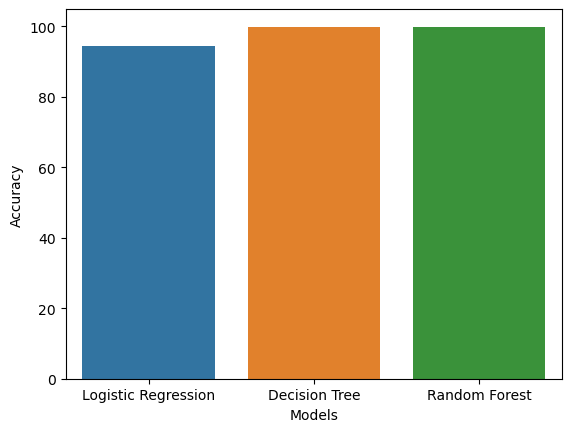

In [320]:
sns.barplot(x='Models',y='Accuracy',data=result_oversampling)

#### According to Oversampling , Random Forest Classifier will be the best choice 

#### So overall we will use Random Forest Classifier for our problem 

### Train the Random Forest Classifier on Whole Dataset

In [331]:
rf3=RandomForestClassifier()
rf3.fit(X_resample,y_resample)

RandomForestClassifier()

### Save the Model

In [346]:
joblib.dump(rf3,"credit card_fraud_detection_model")

['credit card_fraud_detection_model']

In [348]:
model=joblib.load("credit card_fraud_detection_model")

In [350]:
pred=model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\kaust\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [352]:
if pred==0:
    print('Normal Transaction')
else:
    print('Fraudulent Transaction')

Normal Transaction
